In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-30 07:31:06.920767: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5_without_spurs1.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1    -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2    -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3    -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4     0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...        ...       ...         ...          ...          ...          ...   
9993  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
9994  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
9995  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
9996  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
9997  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

           Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0     4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1     4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2     4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3     4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4     4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...        ...       ...        ...        ...  ...                  ...   
9993  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
9994  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
9995  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
9996  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
9997  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0              67.379997           22.689999            62.099998   
1              67.379997           22.689999            62.099998   
2             -98.750000          -52.799999            57.230000   
3             -98.750000          -52.799999            57.230000   
4             101.639999          146.940002            36.759998   
...                  ...                 ...                  ...   
9993          -57.930000         -102.669998            58.980000   
9994           60.469997           15.740000            52.669998   
9995           60.469997           15.740000            52.669998   
9996          -99.439995          -53.639999            52.279999   
9997         -101.619995          -55.939999            47.379997   

      inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0              50.959999           61.959999    20180403T030600Z   
1              50.959999           61.959999    20180403T030600Z   
2              45.759998           57.119999    20180404T042700Z   
3              45.759998           57.119999    20180404T042700Z   
4              27.439999           36.730000    20180404T175400Z   
...                  ...                 ...                 ...   
9993           47.930000           59.090000    20200121T132400Z   
9994           41.669998           52.629997    20200121T200600Z   
9995           41.669998           52.629997    20200121T200600Z   
9996           41.049999           52.180000    20200121T214800Z   
9997           36.430000           47.020000    20200121T221800Z   

            stop_sensing_time        u10        v10  
0     20180403T044758.125000Z   1.125601  -5.806853  
1     20180403T044758.125000Z   0.063854  -5.914174  
2     20180404T060858.125000Z  -0.423638   1.525652  
3     20180404T060858.125000Z   0.056501   2.623066  
4     20180404T193258.125000Z  -0.504519   6.171912  
...                       ...        ...        ...  
9993  20200121T150558.125000Z   1.486705  11.194453  
9994  20200121T214758.125000Z   4.111918   8.730406  
9995  20200121T214

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1    -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2    -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3    -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4     0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...        ...       ...         ...          ...          ...          ...   
9993  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
9994  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
9995  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
9996  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
9997  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

           Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0     4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1     4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2     4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3     4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4     4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...        ...       ...        ...        ...  ...                  ...   
9993  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
9994  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
9995  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
9996  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
9997  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0              67.379997           22.689999            62.099998   
1              67.379997           22.689999            62.099998   
2             -98.750000          -52.799999            57.230000   
3             -98.750000          -52.799999            57.230000   
4             101.639999          146.940002            36.759998   
...                  ...                 ...                  ...   
9993          -57.930000         -102.669998            58.980000   
9994           60.469997           15.740000            52.669998   
9995           60.469997           15.740000            52.669998   
9996          -99.439995          -53.639999            52.279999   
9997         -101.619995          -55.939999            47.379997   

      inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0              50.959999           61.959999    20180403T030600Z   
1              50.959999           61.959999    20180403T030600Z   
2              45.759998           57.119999    20180404T042700Z   
3              45.759998           57.119999    20180404T042700Z   
4              27.439999           36.730000    20180404T175400Z   
...                  ...                 ...                 ...   
9993           47.930000           59.090000    20200121T132400Z   
9994           41.669998           52.629997    20200121T200600Z   
9995           41.669998           52.629997    20200121T200600Z   
9996           41.049999           52.180000    20200121T214800Z   
9997           36.430000           47.020000    20200121T221800Z   

            stop_sensing_time        u10        v10  
0     20180403T044758.125000Z   1.125601  -5.806853  
1     20180403T044758.125000Z   0.063854  -5.914174  
2     20180404T060858.125000Z  -0.423638   1.525652  
3     20180404T060858.125000Z   0.056501   2.623066  
4     20180404T193258.125000Z  -0.504519   6.171912  
...                       ...        ...        ...  
9993  20200121T150558.125000Z   1.486705  11.194453  
9994  20200121T214758.125000Z   4.111918   8.730406  
9995  20200121T214

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
9626  0.078067 -0.018678  308.009999  2485.276604  1021.886352  1023.132504   
4101  0.455734  0.214497  342.430002  2485.382490  1009.739629  1010.974509   
8683 -0.012150 -0.032903  348.149998  2482.060605  1010.236972  1011.460995   
6116  0.155169 -0.072199  376.110002  2449.791792  1012.087269  1013.244498   
4981  0.618789  0.095465  337.542105  2486.613571  1003.750346  1004.976852   
...        ...       ...         ...          ...          ...          ...   
9119 -0.203744 -0.248952  334.574997  2470.989855   994.680703   995.886502   
7832 -0.012150 -0.032903  265.205005  2491.979453   989.732447   990.964005   
9509  0.078067 -0.018678  334.165001  2481.488700  1006.442064  1007.660013   
2283 -0.155996 -0.001206  294.130000  2482.470287  1023.041099  1024.315005   
8799 -0.012150 -0.032903  339.080002  2479.909096  1000.534464  1001.742999   

            Q10       Qair         RH       RH10  ...  azi_angle_trip_fore  \
9626   5.283941   5.307423  89.166352  88.956158  ...            54.949997   
4101   4.963379   5.000481  88.237874  87.991604  ...            71.339996   
8683   6.507286   6.503420  96.736003  96.881840  ...          -146.860001   
6116  14.877578  14.933106  85.877700  85.194925  ...          -144.399994   
4981   5.077564   5.106566  88.221949  87.935179  ...            67.699997   
...         ...        ...        ...        ...  ...                  ...   
9119   4.406105   4.615132  69.006350  67.089942  ...           115.610001   
7832   2.700275   2.784448  65.272654  63.861253  ...            49.649998   
9509   5.957429   6.000322  86.412503  85.791253  ...           106.619995   
2283   2.590541   2.709164  68.665147  66.956363  ...           -24.510000   
8799   6.460594   6.479896  90.002153  89.856960  ...            56.399998   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
9626          100.769997          146.470001            48.789997   
4101          115.869995          160.309998            52.719997   
8683         -101.159996          -55.509998            46.570000   
6116          -98.470001          -52.459999            60.430000   
4981          112.379997          156.949997            37.180000   
...                  ...                 ...                  ...   
9119           70.769997           25.869999            50.689999   
7832           96.159996          142.500000            62.919998   
9509           61.910000           17.100000            45.549999   
2283          -69.269997         -114.119995            60.549999   
8799          101.900002          147.419998            42.509998   

      inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
9626           37.829998           48.779999    20191018T122400Z   
4101           41.770000           52.549999    20151216T131800Z   
8683           35.770000           46.419998    20210703T221800Z   
6116           48.969997           60.320000    20170906T005100Z   
4981           27.869999           37.009998    20160825T133900Z   
...                  ...                 ...                 ...   
9119           39.770000           50.629997    20181127T232700Z   
7832           51.419998           62.949997    20210223T120600Z   
9509           35.090000           45.509998    20190926T202700Z   
2283           49.480000           60.639999    20180208T151200Z   
8799           32.189999           42.270000    20210724T123300Z   

            stop_sensing_time        u10        v10  
9626  20191018T140558.125000Z  -0.585887  -4.291498  
4101  20151216T145958.125000Z  -0.288052 -10.329768  
8683  20210703T235958.125000Z   6.045577   7.036373  
6116  20170906T023258.125000Z   2.170468   9.886921  
4981  20160825T151758.125000Z   6.698467  -3.108835  
...                       ...        ...        ...  
9119  20181128T011158.125000Z  12.211238   0.717163  
7832  20210223T134458.125000Z   6.045577   7.036

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

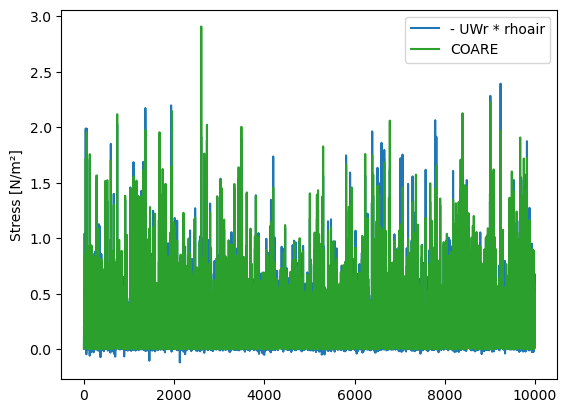

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

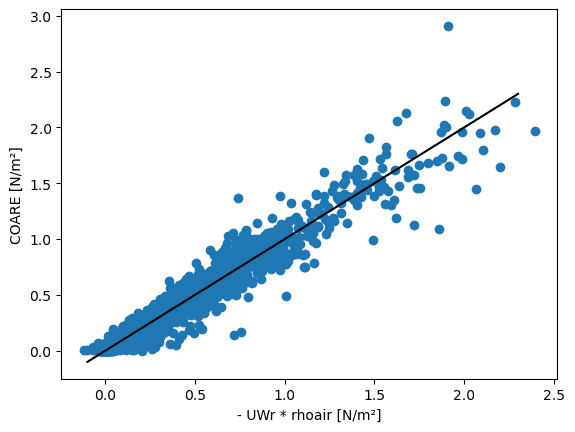

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(9998, 67)

In [13]:
df.shape[0]*0.8

7998.400000000001

In [14]:
split_idx = int(df.shape[0]*0.8)

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  azi_angle_trip_fore  \
9626        -23.692396       -19.716181       -23.761959            54.949997   
4101        -21.523678       -17.208441       -15.873583            71.339996   
8683        -17.890451       -15.187499       -22.701605          -146.860001   
6116        -20.637577       -22.526400       -22.946234          -144.399994   
4981        -15.948977        -8.738081       -16.258532            67.699997   
...                ...              ...              ...                  ...   
9119        -16.974600       -12.214600       -18.855486           115.610001   
7832        -21.509340       -18.463285       -16.534340            49.649998   
9509        -22.868994       -17.679859       -20.473143           106.619995   
2283        -18.350641       -18.557043       -23.477961           -24.510000   
8799        -10.522536        -8.165942       -16.287926            56.399998   

      azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
9626          100.769997          146.470001            48.789997   
4101          115.869995          160.309998            52.719997   
8683         -101.159996          -55.509998            46.570000   
6116          -98.470001          -52.459999            60.430000   
4981          112.379997          156.949997            37.180000   
...                  ...                 ...                  ...   
9119           70.769997           25.869999            50.689999   
7832           96.159996          142.500000            62.919998   
9509           61.910000           17.100000            45.549999   
2283          -69.269997         -114.119995            60.549999   
8799          101.900002          147.419998            42.509998   

      inc_angle_trip_mid  inc_angle_trip_aft        u10        v10  
9626           37.829998           48.779999  -0.585887  -4.291498  
4101           41.770000           52.549999  -0.288052 -10.329768  
8683           35.770000           46.419998   6.045577   7.036373  
6116           48.969997           60.320000   2.170468   9.886921  
4981           27.869999           37.009998   6.698467  -3.108835  
...                  ...                 ...        ...        ...  
9119           39.770000           50.629997  12.211238   0.717163  
7832           51.419998           62.949997   6.045577   7.036373  
9509           35.090000           45.509998  -0.002161  -5.598792  
2283           49.480000           60.639999   3.458293  -8.354007  
8799           32.189999           42.270000   6.045577   7.036373  

[9998 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

9626    0.004143
4101    0.163965
8683    0.048829
6116    0.168094
4981    0.057230
          ...   
9119    0.352143
7832    0.239322
9509    0.028252
2283    0.109268
8799    0.570802
Length: 9998, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

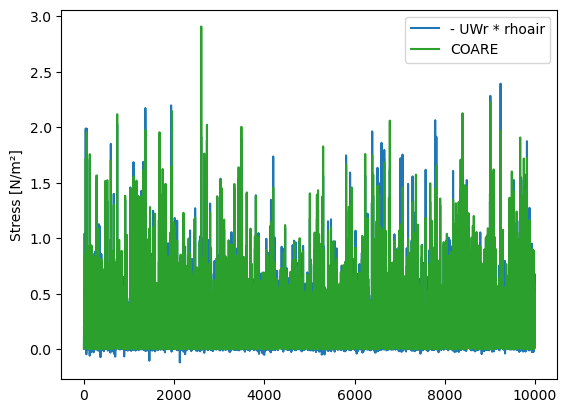

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-30 07:31:10.548298: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-30 07:31:10.548944: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-30 07:31:10.548955: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-30 07:31:10.548976: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-30 07:31:10.549248: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

175/175 [==============================] - 1s 3ms/step - loss: 1.2276 - mean_absolute_error: 0.7730 - val_loss: 0.8906 - val_mean_absolute_error: 0.6313
Epoch 2/500
175/175 [==============================] - 0s 624us/step - loss: 1.0124 - mean_absolute_error: 0.6155 - val_loss: 0.7666 - val_mean_absolute_error: 0.5582
Epoch 3/500
175/175 [==============================] - 0s 610us/step - loss: 0.7879 - mean_absolute_error: 0.5551 - val_loss: 0.7325 - val_mean_absolute_error: 0.5391
Epoch 4/500
175/175 [==============================] - 0s 631us/step - loss: 0.6687 - mean_absolute_error: 0.5261 - val_loss: 0.7195 - val_mean_absolute_error: 0.5341
Epoch 5/500
175/175 [==============================] - 0s 620us/step - loss: 0.6750 - mean_absolute_error: 0.5238 - val_loss: 0.7118 - val_mean_absolute_error: 0.5291
Epoch 6/500
175/175 [==============================] - 0s 624us/step - loss: 0.6837 - mean_absolute_error: 0.5340 - val_loss: 0.7084 - val_mean_absolute_error: 0.5282
Epoch 7/500


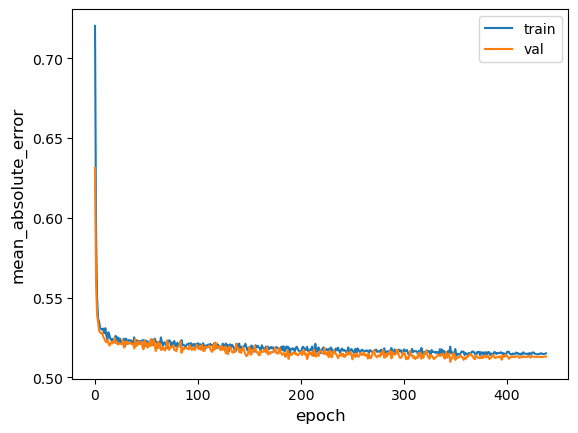

63/63 [==============================] - 0s 630us/step - loss: 0.7592 - mean_absolute_error: 0.5339
Test accuracy 0.5339068174362183
Test loss 0.7591623067855835


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.18650994084455425

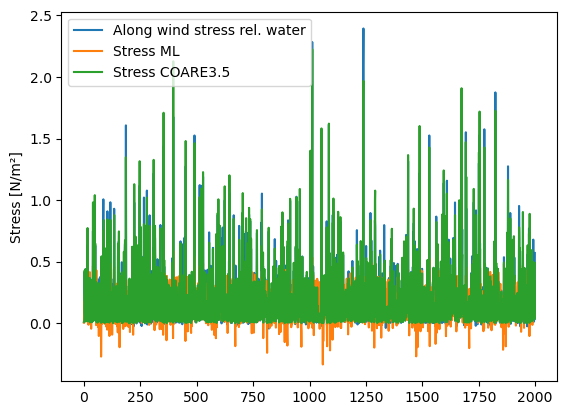

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

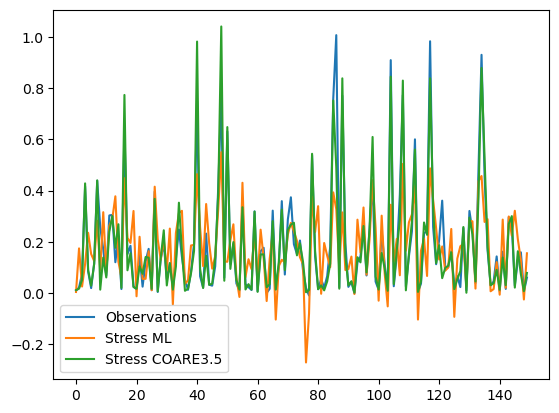

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

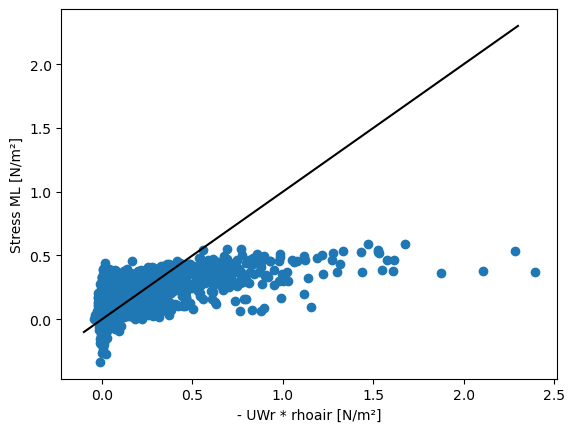

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

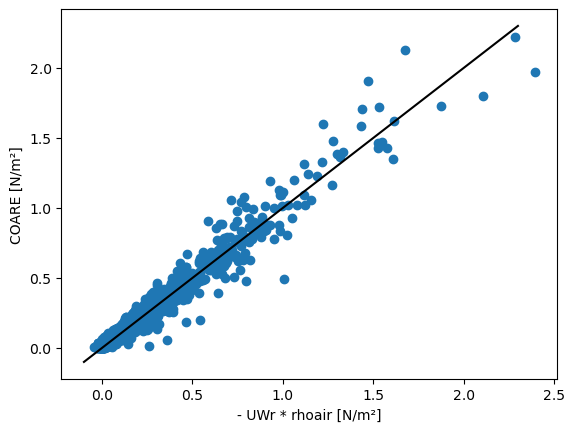

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.28752162161713624

In [35]:
rmse(y_test.values, c_test)

0.052087079044756686

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.60072589],
       [0.60072589, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

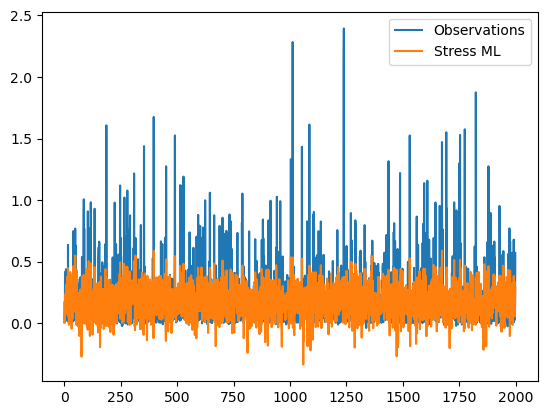

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.60072589],
       [0.60072589, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28752162161713624

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.60072589],
       [0.60072589, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

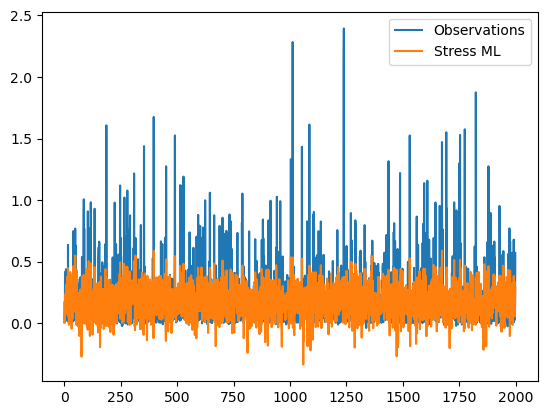

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.60072589],
       [0.60072589, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28752162161713624

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
175/175 [==============================] - 1s 1ms/step - loss: 2.0383 - mean_absolute_error: 1.0317 - val_loss: 1.2400 - val_mean_absolute_error: 0.7458
Epoch 2/500
175/175 [==============================] - 0s 886us/step - loss: 1.2021 - mean_absolute_error: 0.7354 - val_loss: 0.9839 - val_mean_absolute_error: 0.6355
Epoch 3/500
175/175 [==============================] - 0s 898us/step - loss: 0.9284 - mean_absolute_error: 0.6172 - val_loss: 0.8353 - val_mean_absolute_error: 0.5651
Epoch 4/500
175/175 [==============================] - 0s 935us/step - loss: 0.8373 - mean_absolute_error: 0.5818 - val_loss: 0.7485 - val_mean_absolute_error: 0.5220
Epoch 5/500
175/175 [==============================] - 0s 842us/step - loss: 0.6885 - mean_absolute_error: 0.5290 - val_loss: 0.6814 - val_mean_absolute_error: 0.4979
Epoch 6/500
175/175 [==============================] - 0s 816us/step - loss: 0.6463 - mean_absolute_error: 0.5218 - val_loss: 0.6457 - val_mean_absolute_error: 0.4853


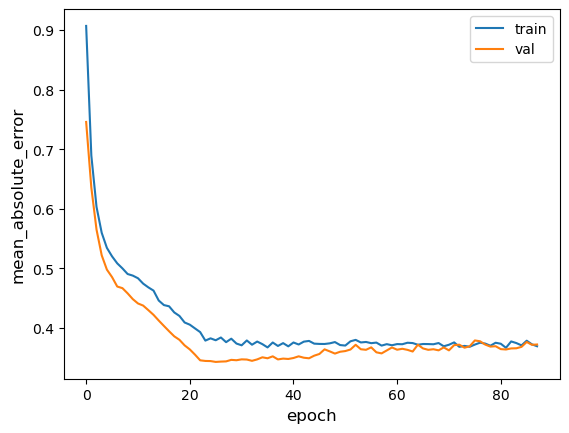

63/63 [==============================] - 0s 590us/step - loss: 0.5527 - mean_absolute_error: 0.3825
Test accuracy 0.3824842572212219
Test loss 0.5527441501617432


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

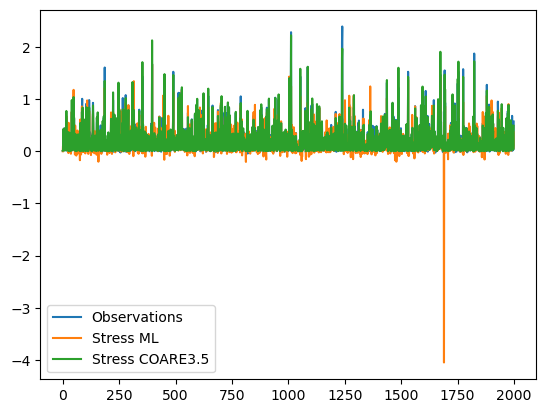

In [53]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

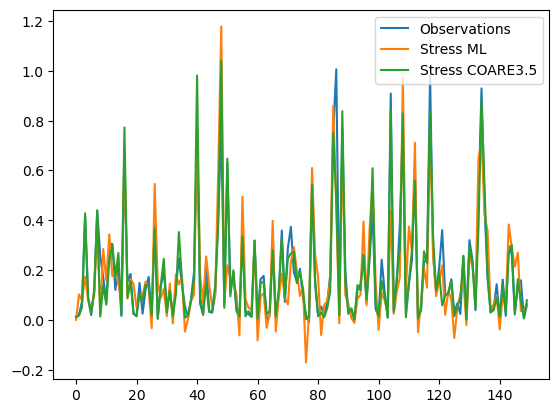

In [54]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.3457579029104088

## Correlation

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74998133],
       [0.74998133, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [58]:
y_test.values.shape

(2000,)

In [59]:
y_test_pred[:, 0].shape

(2000,)

In [60]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [61]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.00961155, 0.02212325, 0.07475581, ..., 0.02825179, 0.10926779,
       0.57080157])

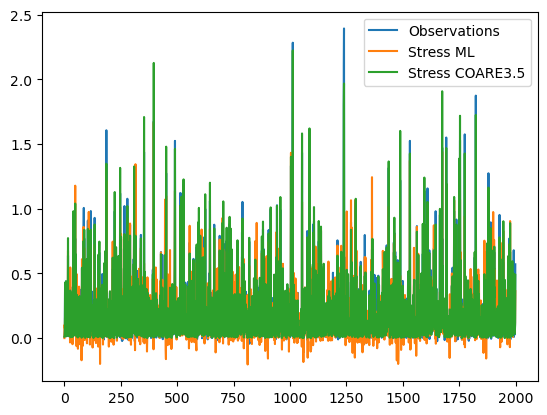

In [62]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

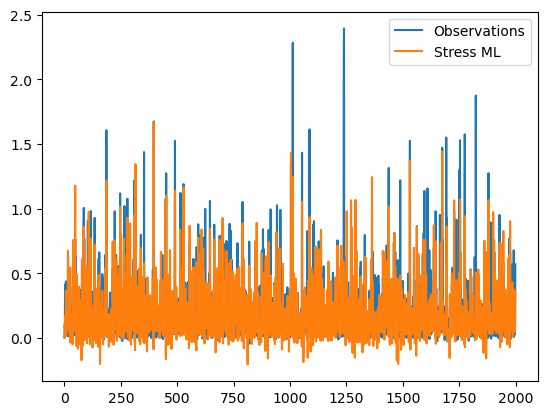

In [63]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [64]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.       , 0.9792529],
       [0.9792529, 1.       ]])

In [65]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.332590871306458

Text(0, 0.5, 'Stress ML [N/m²]')

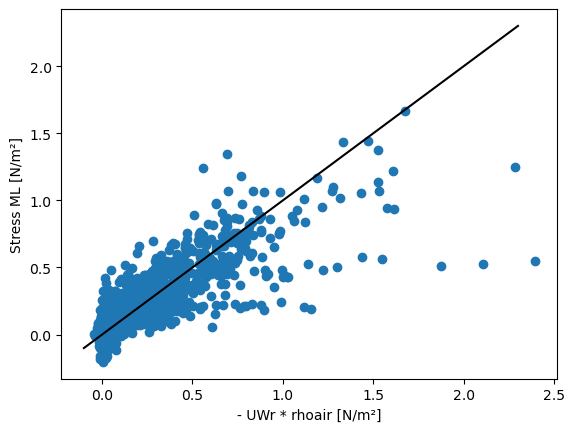

In [66]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [67]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [68]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [69]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
88/88 [==============================] - 0s 2ms/step - loss: 5.5474 - mean_absolute_error: 1.7400 - val_loss: 2.5746 - val_mean_absolute_error: 1.1292
Epoch 2/500
88/88 [==============================] - 0s 1ms/step - loss: 3.9184 - mean_absolute_error: 1.4357 - val_loss: 2.0635 - val_mean_absolute_error: 0.9948
Epoch 3/500
88/88 [==============================] - 0s 996us/step - loss: 2.9353 - mean_absolute_error: 1.2202 - val_loss: 1.6910 - val_mean_absolute_error: 0.8799
Epoch 4/500
88/88 [==============================] - 0s 966us/step - loss: 2.3654 - mean_absolute_error: 1.0847 - val_loss: 1.4346 - val_mean_absolute_error: 0.7945
Epoch 5/500
88/88 [==============================] - 0s 981us/step - loss: 1.8976 - mean_absolute_error: 0.9629 - val_loss: 1.2630 - val_mean_absolute_error: 0.7301
Epoch 6/500
88/88 [==============================] - 0s 1ms/step - loss: 1.5600 - mean_absolute_error: 0.8670 - val_loss: 1.1561 - val_mean_absolute_error: 0.6950
Epoch 7/500
88/8

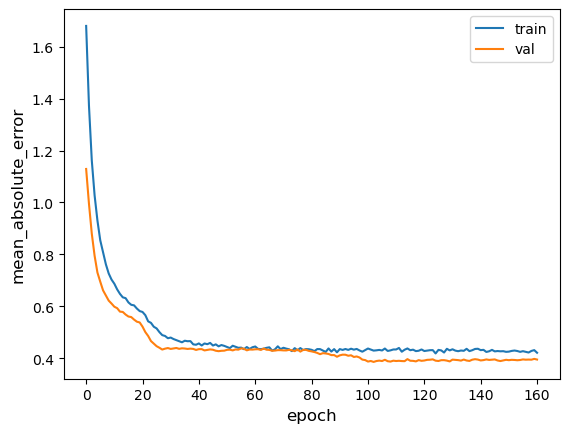

63/63 [==============================] - 0s 343us/step - loss: 0.5785 - mean_absolute_error: 0.4155
Test accuracy 0.41548940539360046
Test loss 0.578492283821106


In [70]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [71]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [72]:
rmse(y_test.values, y_test_pred)

0.2958568141524185

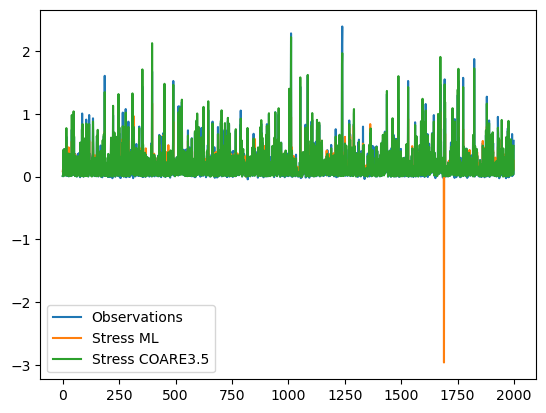

In [73]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

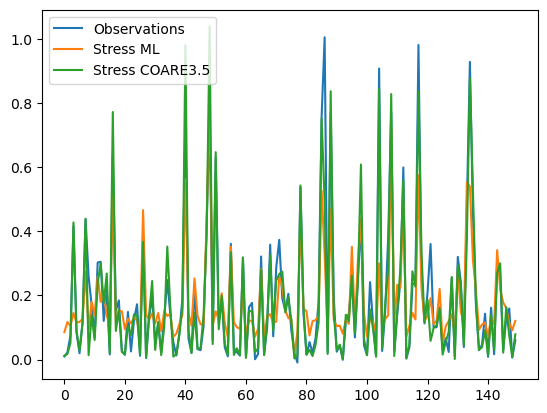

In [74]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

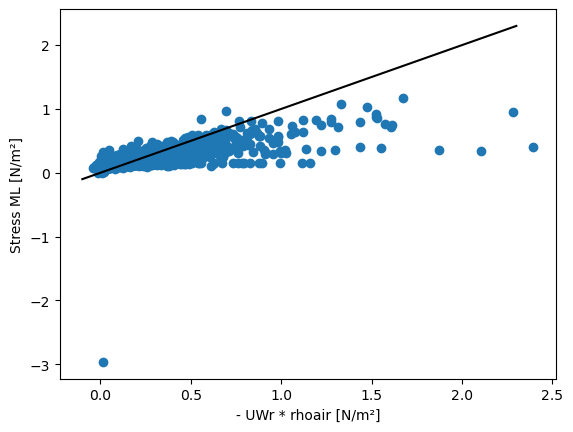

In [75]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72468243],
       [0.72468243, 1.        ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

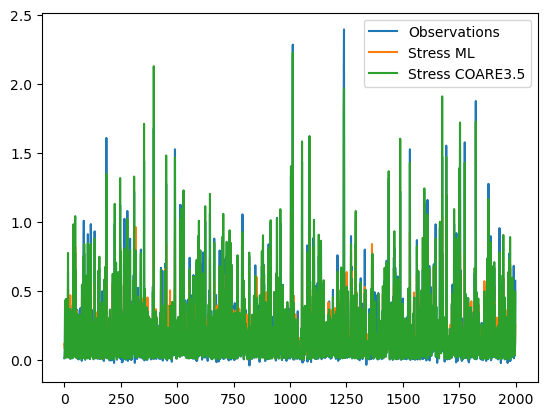

In [78]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

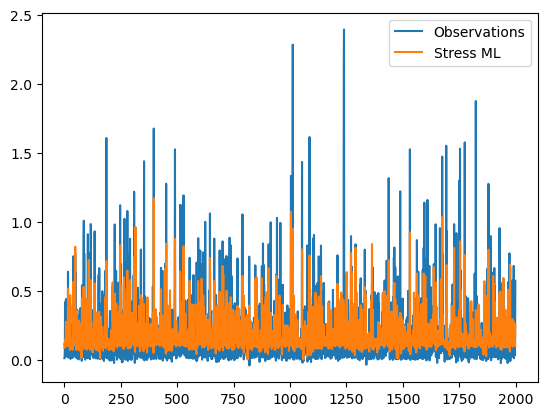

In [79]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [80]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.       , 0.9792529],
       [0.9792529, 1.       ]])

In [81]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2874033732287015

Text(0, 0.5, 'Stress ML [N/m²]')

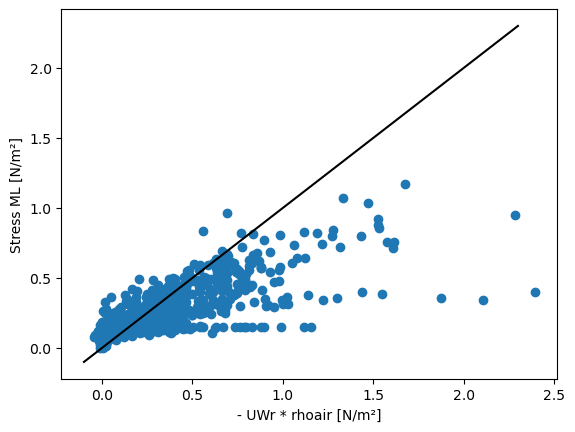

In [82]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [83]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [84]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [85]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
175/175 [==============================] - 1s 1ms/step - loss: 1.8455 - mean_absolute_error: 1.0283 - val_loss: 0.9583 - val_mean_absolute_error: 0.6197
Epoch 2/500
175/175 [==============================] - 0s 821us/step - loss: 1.0226 - mean_absolute_error: 0.7349 - val_loss: 0.7490 - val_mean_absolute_error: 0.5399
Epoch 3/500
175/175 [==============================] - 0s 803us/step - loss: 0.8877 - mean_absolute_error: 0.6428 - val_loss: 0.6609 - val_mean_absolute_error: 0.4931
Epoch 4/500
175/175 [==============================] - 0s 775us/step - loss: 0.8271 - mean_absolute_error: 0.5998 - val_loss: 0.6222 - val_mean_absolute_error: 0.4669
Epoch 5/500
175/175 [==============================] - 0s 775us/step - loss: 0.6818 - mean_absolute_error: 0.5417 - val_loss: 0.5892 - val_mean_absolute_error: 0.4518
Epoch 6/500
175/175 [==============================] - 0s 762us/step - loss: 0.6740 - mean_absolute_error: 0.5221 - val_loss: 0.5685 - val_mean_absolute_error: 0.4390


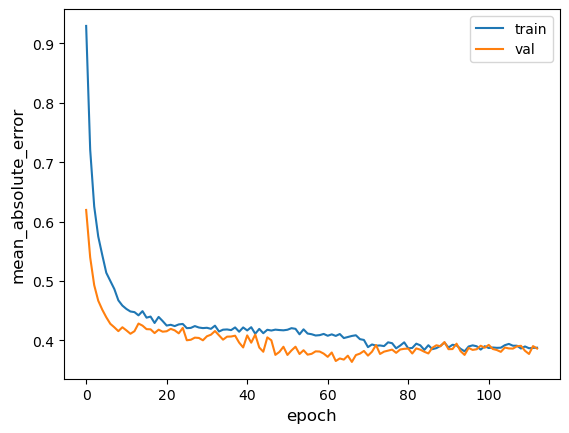

63/63 [==============================] - 0s 572us/step - loss: 0.4820 - mean_absolute_error: 0.4031
Test accuracy 0.40311720967292786
Test loss 0.4819868206977844


In [86]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [87]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [88]:
rmse(y_test.values, y_test_pred)

0.30319718146395935

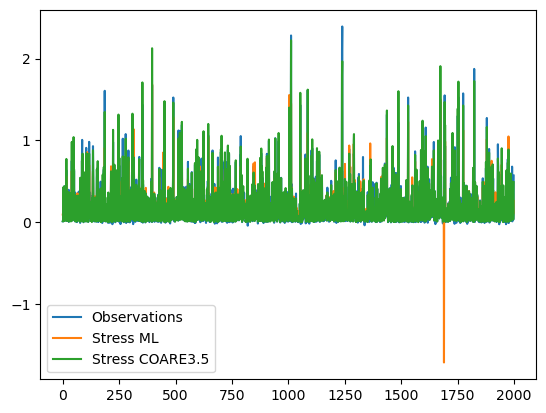

In [89]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

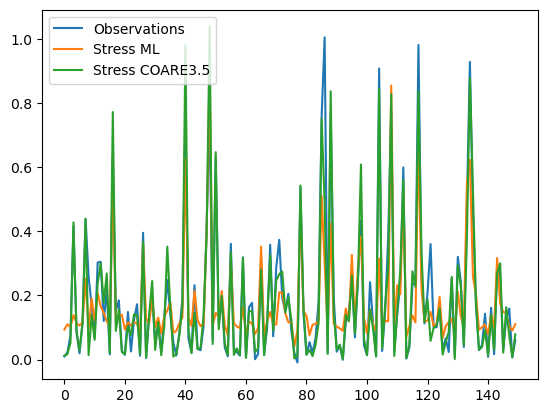

In [90]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

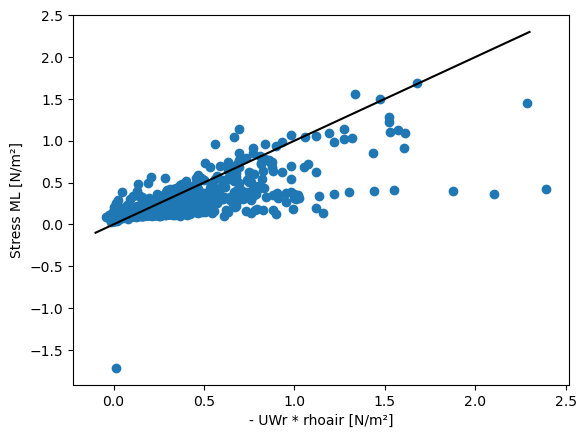

In [91]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [92]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.77936011],
       [0.77936011, 1.        ]])

In [93]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

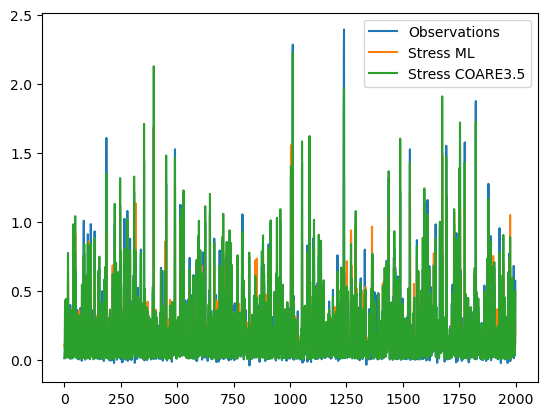

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

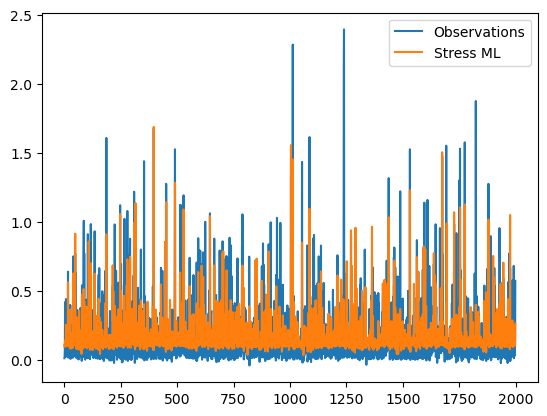

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [96]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.       , 0.9792529],
       [0.9792529, 1.       ]])

In [97]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.3002500438427697

Text(0, 0.5, 'Stress ML [N/m²]')

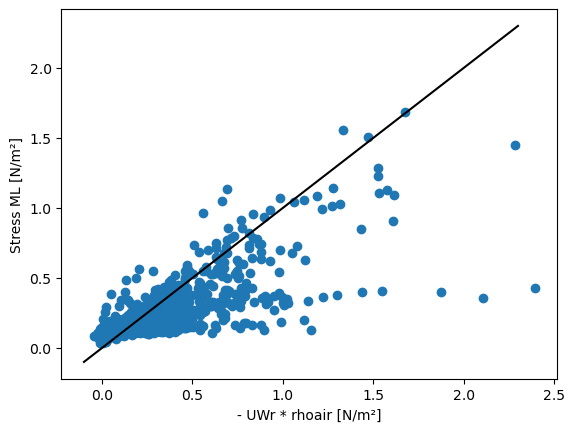

In [98]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [101]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
175/175 [==============================] - 1s 2ms/step - loss: 1.2282 - mean_absolute_error: 0.8000 - val_loss: 0.7430 - val_mean_absolute_error: 0.5405
Epoch 2/500
175/175 [==============================] - 0s 1ms/step - loss: 0.6844 - mean_absolute_error: 0.5774 - val_loss: 0.5022 - val_mean_absolute_error: 0.3798
Epoch 3/500
175/175 [==============================] - 0s 1ms/step - loss: 0.5657 - mean_absolute_error: 0.5255 - val_loss: 0.4009 - val_mean_absolute_error: 0.3278
Epoch 4/500
175/175 [==============================] - 0s 1ms/step - loss: 0.5756 - mean_absolute_error: 0.4875 - val_loss: 0.3715 - val_mean_absolute_error: 0.3173
Epoch 5/500
175/175 [==============================] - 0s 1ms/step - loss: 0.4361 - mean_absolute_error: 0.4470 - val_loss: 0.3933 - val_mean_absolute_error: 0.3214
Epoch 6/500
175/175 [==============================] - 0s 1ms/step - loss: 0.3955 - mean_absolute_error: 0.3949 - val_loss: 0.3360 - val_mean_absolute_error: 0.2963
Epoch 7/50

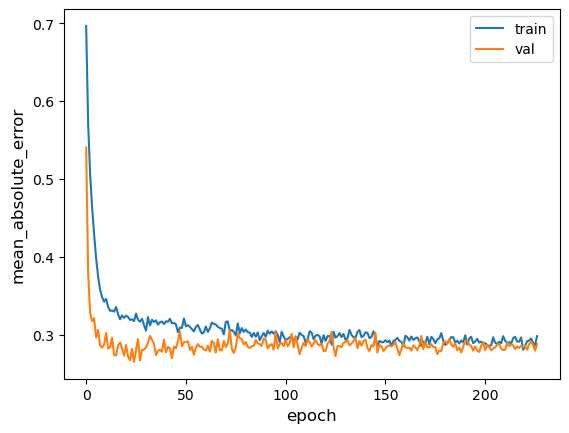

63/63 [==============================] - 0s 631us/step - loss: 0.4148 - mean_absolute_error: 0.3056
Test accuracy 0.3056316673755646
Test loss 0.4147794842720032


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [104]:
rmse(y_test.values, y_test_pred)

0.3353925851265375

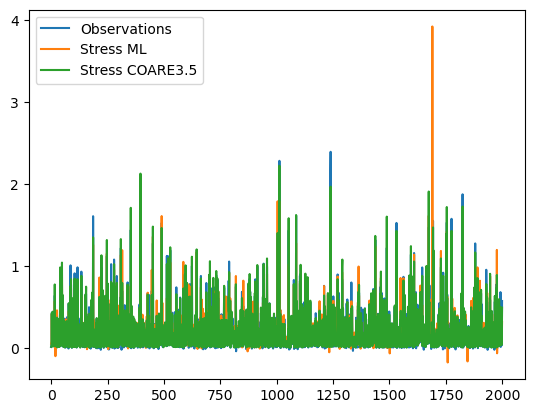

In [105]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

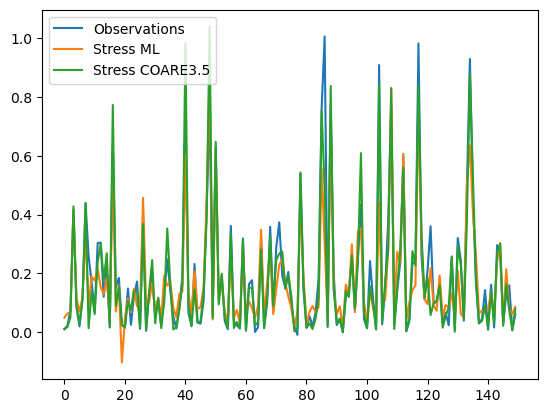

In [106]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

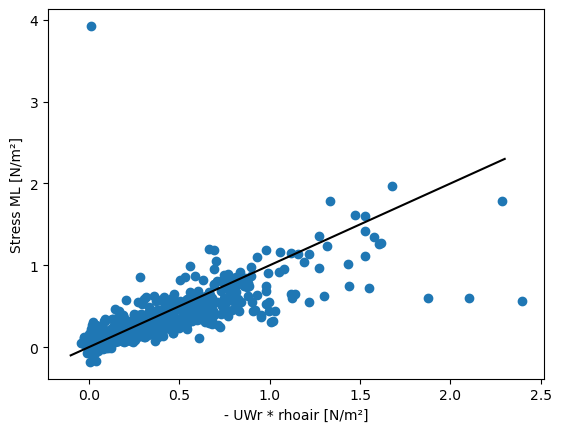

In [107]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80686099],
       [0.80686099, 1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

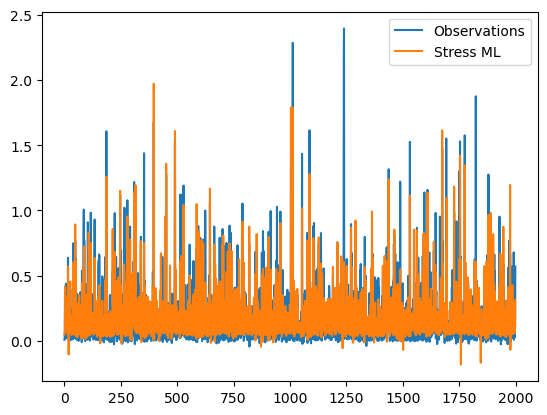

In [110]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [111]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.       , 0.9792529],
       [0.9792529, 1.       ]])

In [112]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.32486983116901447

Text(0, 0.5, 'Stress ML [N/m²]')

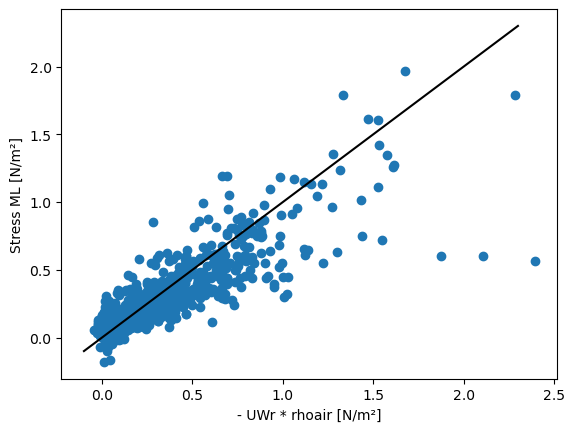

In [113]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [114]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80686099],
       [0.80686099, 1.        ]])

In [115]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [116]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [117]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [118]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
175/175 [==============================] - 1s 5ms/step - loss: 2.4109 - mean_absolute_error: 1.1182 - val_loss: 0.8200 - val_mean_absolute_error: 0.5010
Epoch 2/500
175/175 [==============================] - 1s 4ms/step - loss: 0.6880 - mean_absolute_error: 0.6025 - val_loss: 0.5976 - val_mean_absolute_error: 0.4272
Epoch 3/500
175/175 [==============================] - 1s 4ms/step - loss: 0.5133 - mean_absolute_error: 0.4903 - val_loss: 0.3721 - val_mean_absolute_error: 0.3226
Epoch 4/500
175/175 [==============================] - 1s 4ms/step - loss: 0.4301 - mean_absolute_error: 0.4490 - val_loss: 0.3272 - val_mean_absolute_error: 0.3372
Epoch 5/500
175/175 [==============================] - 1s 4ms/step - loss: 0.3829 - mean_absolute_error: 0.4102 - val_loss: 0.3120 - val_mean_absolute_error: 0.3263
Epoch 6/500
175/175 [==============================] - 1s 4ms/step - loss: 0.3689 - mean_absolute_error: 0.3857 - val_loss: 0.2926 - val_mean_absolute_error: 0.2873
Epoch 7/50

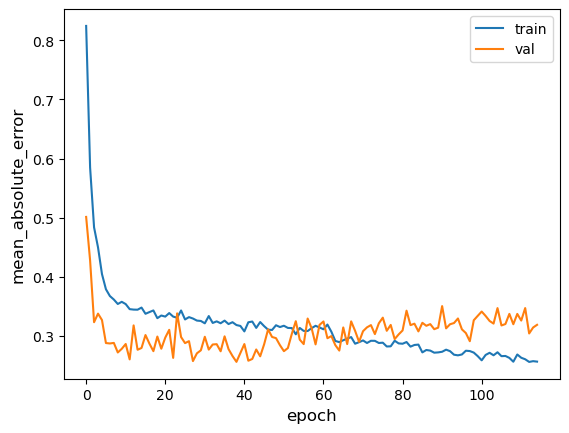

63/63 [==============================] - 0s 953us/step - loss: 0.2977 - mean_absolute_error: 0.3338
Test accuracy 0.3338029682636261
Test loss 0.2976808547973633


In [119]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [120]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [121]:
rmse(y_test.values, y_test_pred)

0.3143855222015433

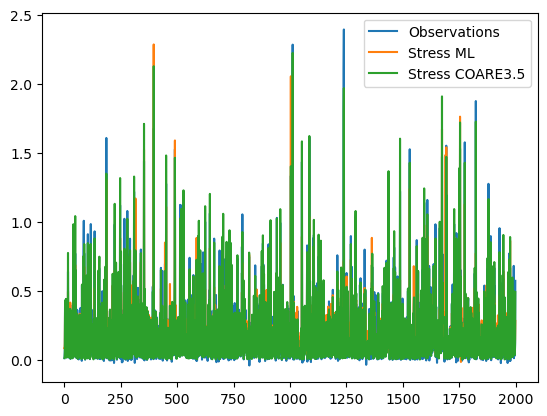

In [122]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

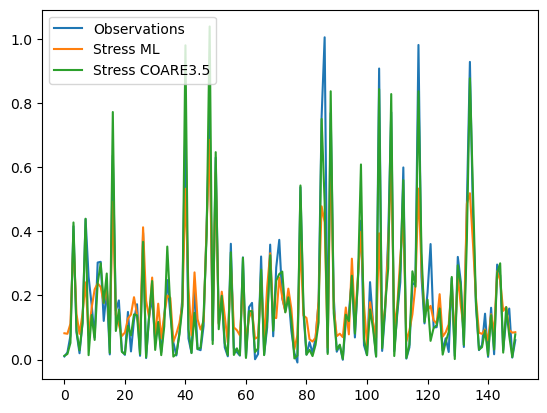

In [123]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [124]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87579766],
       [0.87579766, 1.        ]])

In [125]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

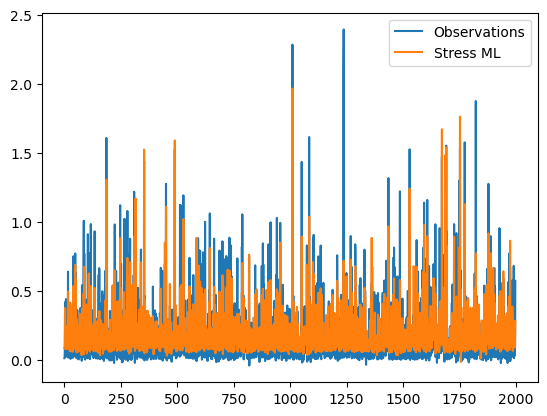

In [126]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [127]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97929322],
       [0.97929322, 1.        ]])

In [128]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3053325003122287

Text(0, 0.5, 'Stress ML [N/m²]')

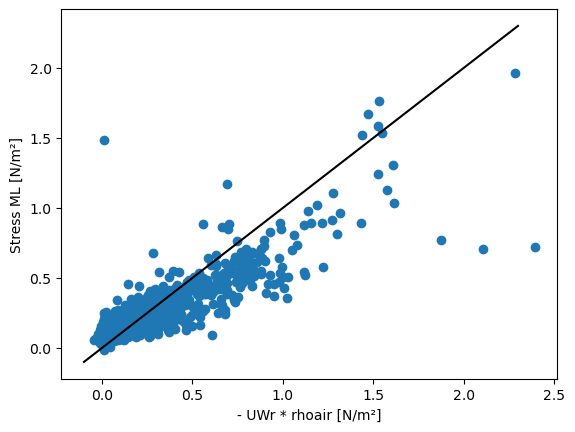

In [129]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [130]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [131]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [132]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
175/175 [==============================] - 3s 12ms/step - loss: 2.7286 - mean_absolute_error: 1.1596 - val_loss: 0.8544 - val_mean_absolute_error: 0.5269
Epoch 2/500
175/175 [==============================] - 2s 11ms/step - loss: 0.8531 - mean_absolute_error: 0.6648 - val_loss: 0.7172 - val_mean_absolute_error: 0.4693
Epoch 3/500
175/175 [==============================] - 2s 12ms/step - loss: 0.5811 - mean_absolute_error: 0.5309 - val_loss: 0.4620 - val_mean_absolute_error: 0.4071
Epoch 4/500
175/175 [==============================] - 2s 12ms/step - loss: 0.5552 - mean_absolute_error: 0.5020 - val_loss: 0.3616 - val_mean_absolute_error: 0.3133
Epoch 5/500
175/175 [==============================] - 2s 12ms/step - loss: 0.4610 - mean_absolute_error: 0.4400 - val_loss: 0.3786 - val_mean_absolute_error: 0.3715
Epoch 6/500
175/175 [==============================] - 2s 12ms/step - loss: 0.4047 - mean_absolute_error: 0.4154 - val_loss: 0.3196 - val_mean_absolute_error: 0.3072
Epoc

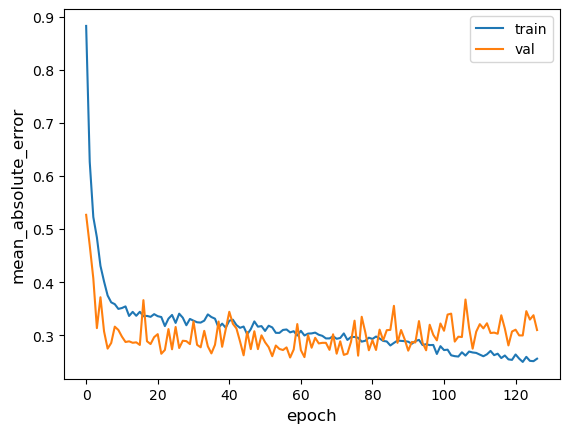

63/63 [==============================] - 0s 2ms/step - loss: 0.3023 - mean_absolute_error: 0.3256
Test accuracy 0.32556575536727905
Test loss 0.302330881357193


In [133]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [134]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [135]:
rmse(y_test.values, y_test_pred)

0.3314547670992115

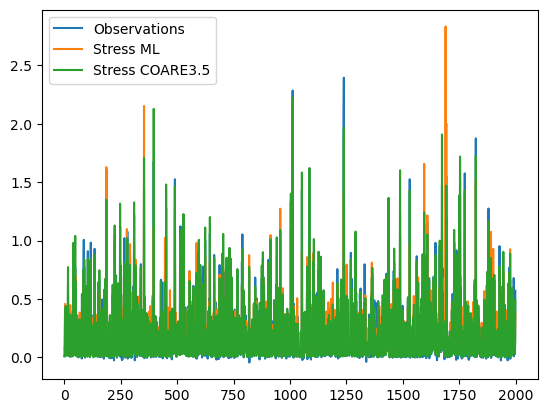

In [136]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

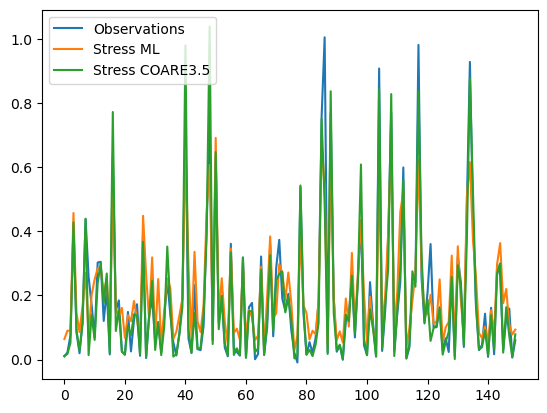

In [137]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [138]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86924218],
       [0.86924218, 1.        ]])

In [139]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

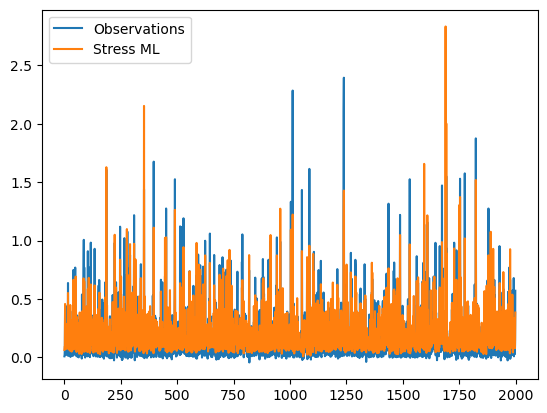

In [140]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [141]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [142]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3314547670992115

Text(0, 0.5, 'Stress ML [N/m²]')

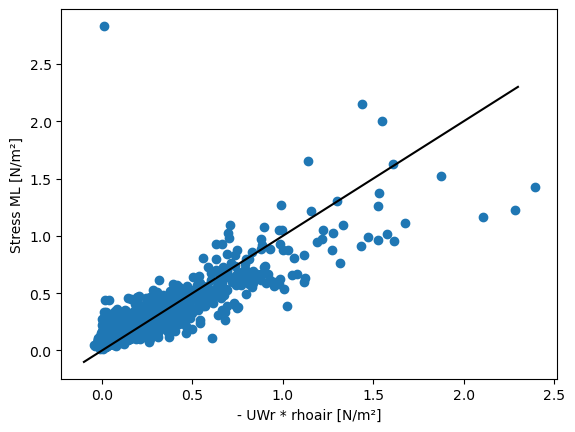

In [143]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

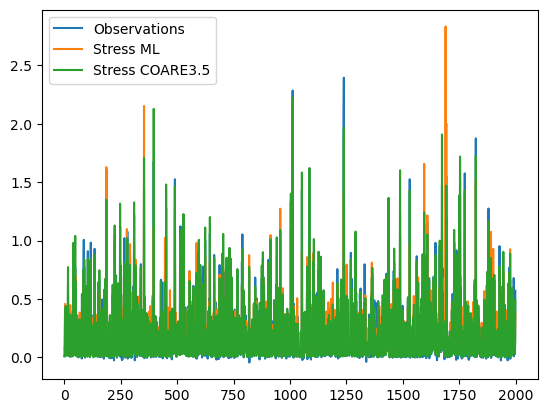

In [144]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

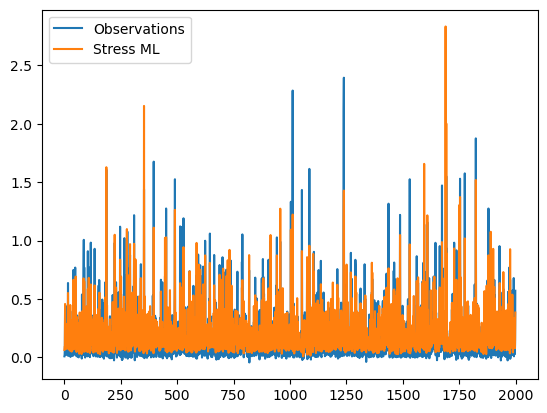

In [145]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [146]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.86924218],
       [0.86924218, 1.        ]])

In [147]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [148]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.3314547670992115

Text(0, 0.5, 'Stress ML [N/m²]')

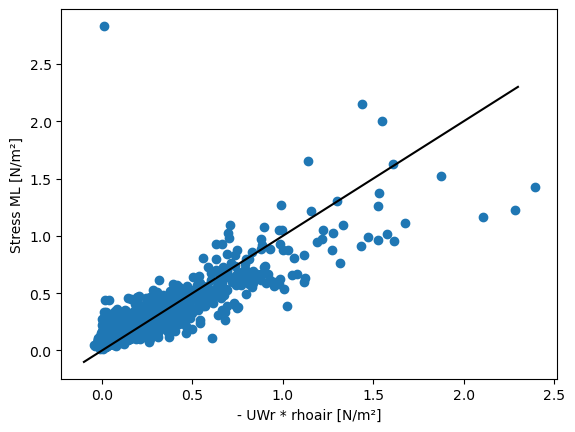

In [149]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [150]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [151]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [152]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
11/11 [==============================] - 1s 40ms/step - loss: 17.2594 - mean_absolute_error: 2.7055 - val_loss: 0.9108 - val_mean_absolute_error: 0.5929
Epoch 2/500
11/11 [==============================] - 0s 29ms/step - loss: 1.8581 - mean_absolute_error: 1.0298 - val_loss: 0.8847 - val_mean_absolute_error: 0.5596
Epoch 3/500
11/11 [==============================] - 0s 29ms/step - loss: 1.3315 - mean_absolute_error: 0.8348 - val_loss: 0.9931 - val_mean_absolute_error: 0.5385
Epoch 4/500
11/11 [==============================] - 0s 29ms/step - loss: 1.0727 - mean_absolute_error: 0.7296 - val_loss: 0.9995 - val_mean_absolute_error: 0.5323
Epoch 5/500
11/11 [==============================] - 0s 29ms/step - loss: 0.8741 - mean_absolute_error: 0.6540 - val_loss: 1.1233 - val_mean_absolute_error: 0.5843
Epoch 6/500
11/11 [==============================] - 0s 29ms/step - loss: 0.9032 - mean_absolute_error: 0.6543 - val_loss: 1.2937 - val_mean_absolute_error: 0.6452
Epoch 7/500
11/

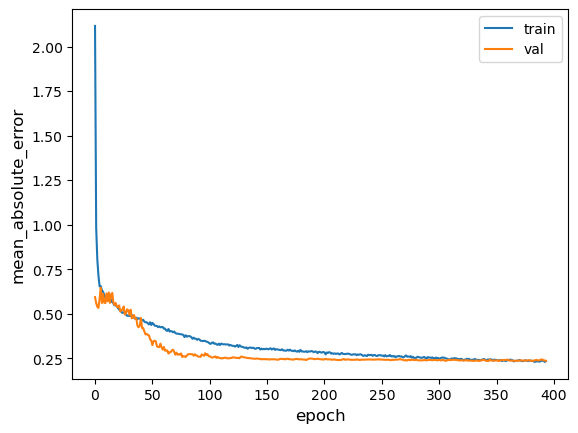

63/63 [==============================] - 0s 2ms/step - loss: 0.2109 - mean_absolute_error: 0.2385
Test accuracy 0.23850181698799133
Test loss 0.21093662083148956


In [153]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [154]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [155]:
rmse(y_test.values, y_test_pred)

0.3272233615573972

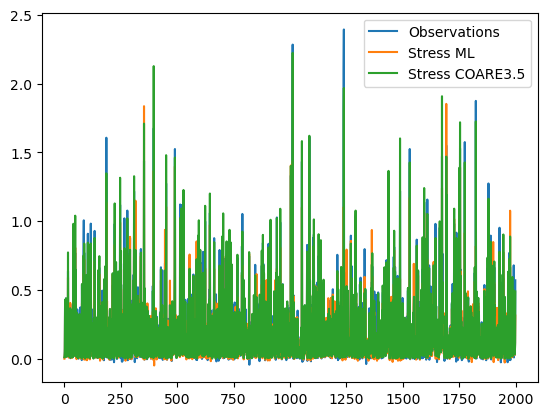

In [156]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

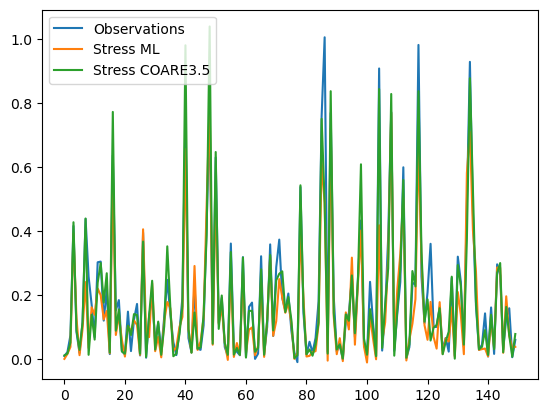

In [157]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [158]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91750652],
       [0.91750652, 1.        ]])

In [159]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

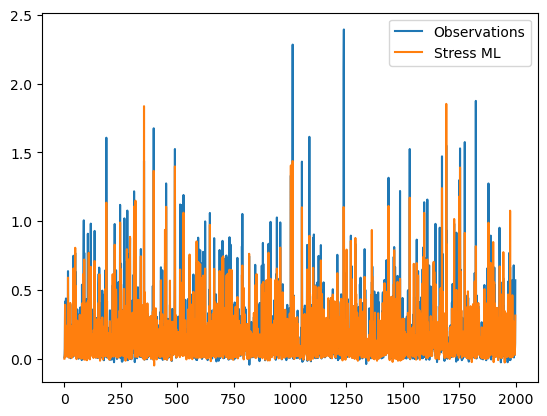

In [160]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [161]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [162]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3272233615573972

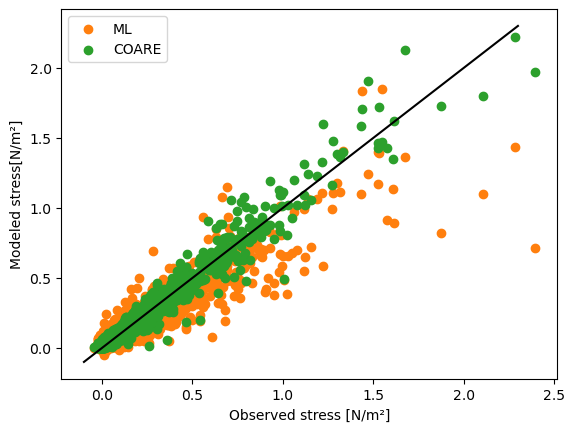

In [163]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

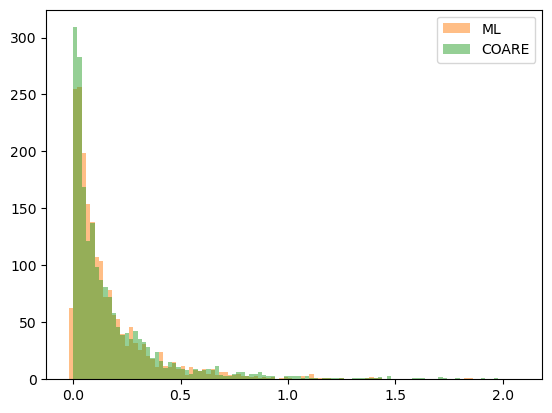

In [164]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
11/11 [==============================] - 1s 41ms/step - loss: 17.9544 - mean_absolute_error: 2.7474 - val_loss: 0.9095 - val_mean_absolute_error: 0.6061
Epoch 2/500
11/11 [==============================] - 0s 30ms/step - loss: 1.8935 - mean_absolute_error: 1.0184 - val_loss: 0.8832 - val_mean_absolute_error: 0.5369
Epoch 3/500
11/11 [==============================] - 0s 29ms/step - loss: 1.2501 - mean_absolute_error: 0.7930 - val_loss: 1.0527 - val_mean_absolute_error: 0.5385
Epoch 4/500
11/11 [==============================] - 0s 29ms/step - loss: 0.9289 - mean_absolute_error: 0.7194 - val_loss: 1.0556 - val_mean_absolute_error: 0.5389
Epoch 5/500
11/11 [==============================] - 0s 29ms/step - loss: 0.8692 - mean_absolute_error: 0.6823 - val_loss: 1.1901 - val_mean_absolute_error: 0.5922
Epoch 6/500
11/11 [==============================] - 0s 30ms/step - loss: 0.8276 - mean_absolute_error: 0.6709 - val_loss: 1.2393 - val_mean_absolute_error: 0.6166
Epoch 7/500
11/

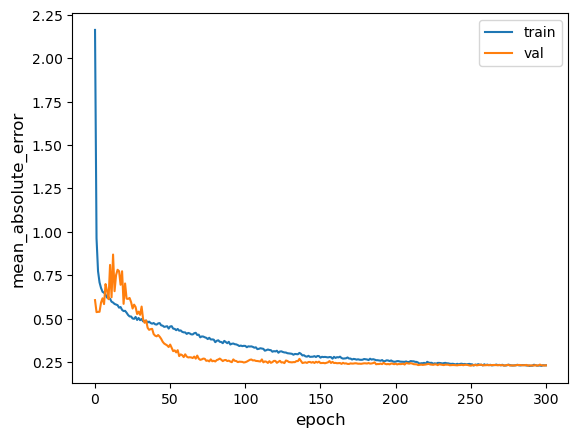

63/63 [==============================] - 0s 2ms/step - loss: 0.1964 - mean_absolute_error: 0.2322
Test accuracy 0.23224204778671265
Test loss 0.1964033842086792


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [170]:
rmse(y_test.values, y_test_pred)

0.32578766057437175

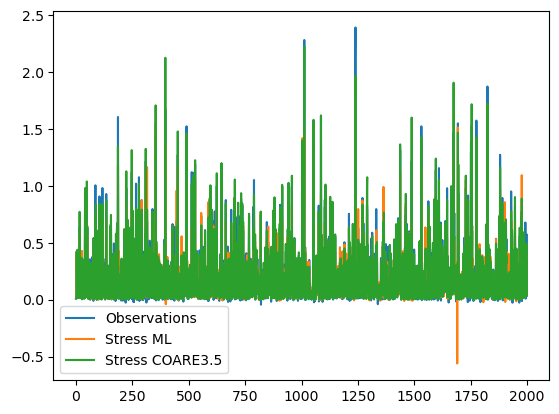

In [171]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

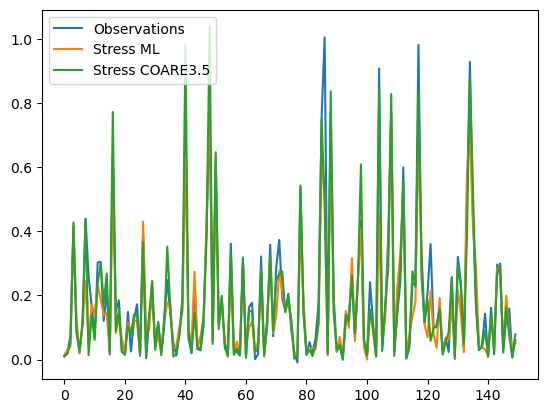

In [172]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.92251738],
       [0.92251738, 1.        ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

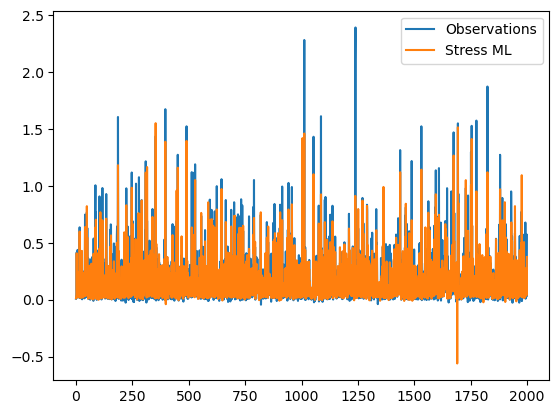

In [175]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [176]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [177]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32578766057437175

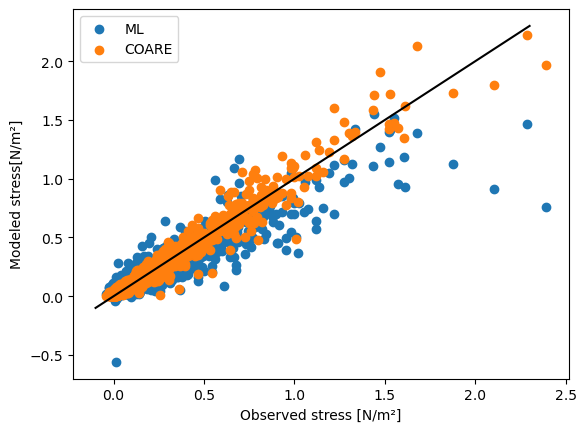

In [178]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

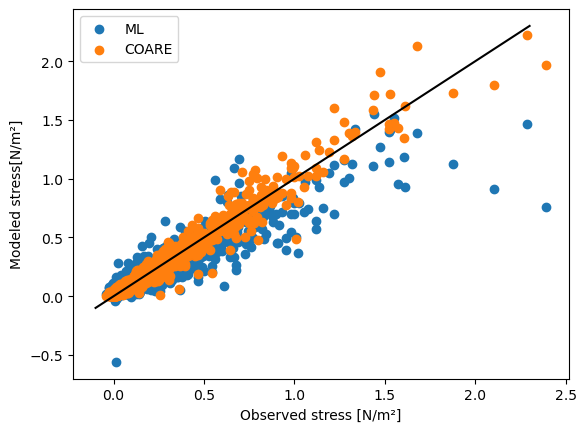

In [179]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [180]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [181]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [182]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 129ms/step - loss: 19.8372 - mean_absolute_error: 2.7662 - val_loss: 0.8829 - val_mean_absolute_error: 0.5778
Epoch 2/500
6/6 [==============================] - 1s 102ms/step - loss: 2.3157 - mean_absolute_error: 1.1402 - val_loss: 0.8380 - val_mean_absolute_error: 0.5430
Epoch 3/500
6/6 [==============================] - 1s 101ms/step - loss: 1.4860 - mean_absolute_error: 0.9070 - val_loss: 0.8242 - val_mean_absolute_error: 0.4914
Epoch 4/500
6/6 [==============================] - 1s 104ms/step - loss: 1.1879 - mean_absolute_error: 0.7975 - val_loss: 0.9029 - val_mean_absolute_error: 0.5190
Epoch 5/500
6/6 [==============================] - 1s 105ms/step - loss: 1.1296 - mean_absolute_error: 0.7495 - val_loss: 1.1225 - val_mean_absolute_error: 0.6179
Epoch 6/500
6/6 [==============================] - 1s 100ms/step - loss: 0.9643 - mean_absolute_error: 0.7218 - val_loss: 1.1830 - val_mean_absolute_error: 0.6214
Epoch 7/500
6/6 [====

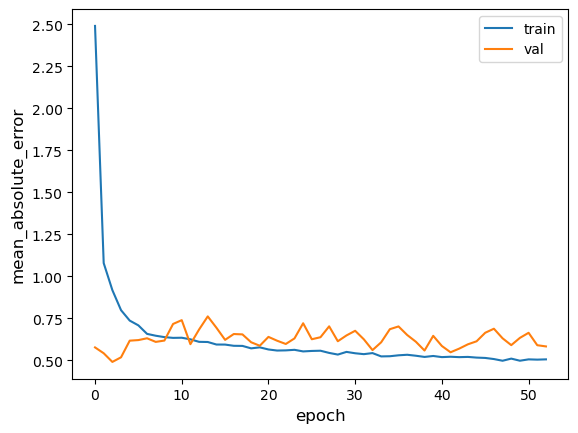

63/63 [==============================] - 0s 7ms/step - loss: 1.2620 - mean_absolute_error: 0.6434
Test accuracy 0.6434078812599182
Test loss 1.262026309967041


In [183]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [184]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [185]:
rmse(y_test.values, y_test_pred)

0.2943561003253444

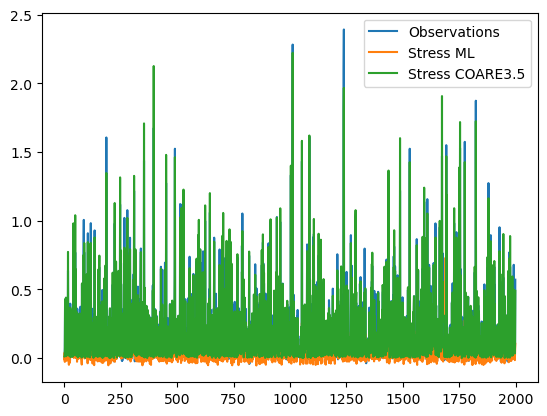

In [186]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

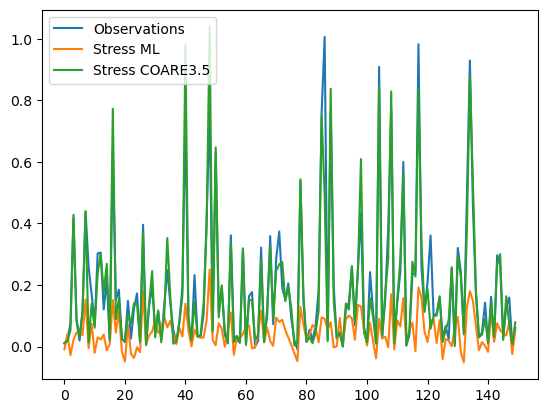

In [187]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [188]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.58144353],
       [0.58144353, 1.        ]])

In [189]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

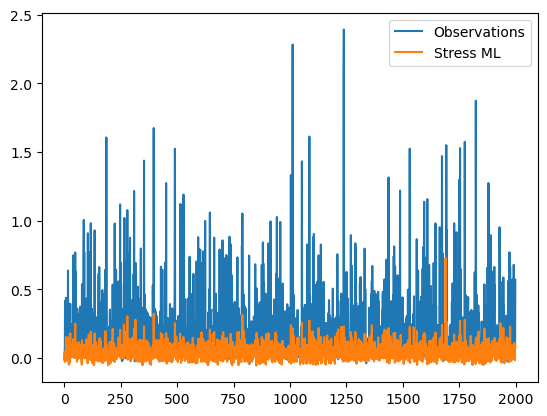

In [190]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [191]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [192]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2943561003253444

Text(0, 0.5, 'Stress ML [N/m²]')

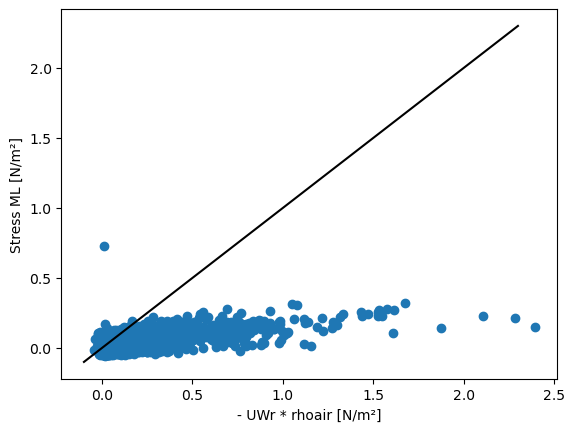

In [193]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [194]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [195]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [196]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 624ms/step - loss: 15.1324 - mean_absolute_error: 2.7287 - val_loss: 1.5573 - val_mean_absolute_error: 0.7471
Epoch 2/1000
3/3 [==============================] - 2s 563ms/step - loss: 4.3902 - mean_absolute_error: 1.6601 - val_loss: 0.9605 - val_mean_absolute_error: 0.6602
Epoch 3/1000
3/3 [==============================] - 2s 552ms/step - loss: 2.3123 - mean_absolute_error: 1.1725 - val_loss: 0.7588 - val_mean_absolute_error: 0.5123
Epoch 4/1000
3/3 [==============================] - 2s 544ms/step - loss: 2.5483 - mean_absolute_error: 1.2465 - val_loss: 1.4691 - val_mean_absolute_error: 0.8152
Epoch 5/1000
3/3 [==============================] - 2s 550ms/step - loss: 1.6488 - mean_absolute_error: 0.9875 - val_loss: 1.9704 - val_mean_absolute_error: 0.9870
Epoch 6/1000
3/3 [==============================] - 2s 551ms/step - loss: 1.4033 - mean_absolute_error: 0.8591 - val_loss: 1.8322 - val_mean_absolute_error: 0.9070
Epoch 7/1000
3/

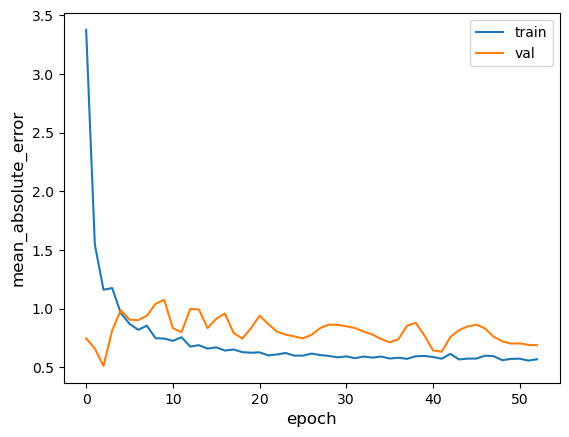

63/63 [==============================] - 2s 25ms/step - loss: 1.6979 - mean_absolute_error: 0.7620
Test accuracy 0.7619771957397461
Test loss 1.69791841506958


In [197]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [198]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [199]:
rmse(y_test.values, y_test_pred)

0.30678516677610096

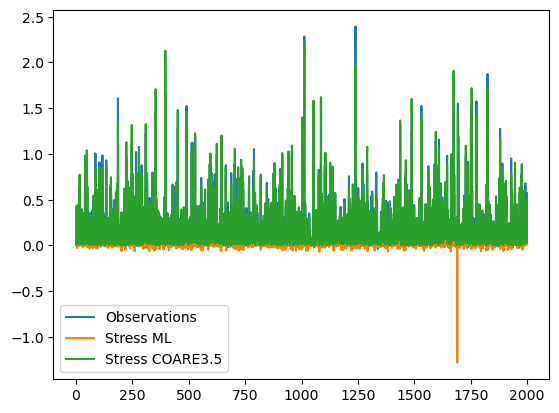

In [200]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

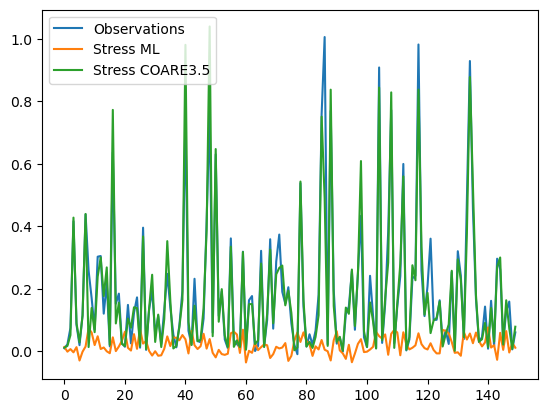

In [201]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [202]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.06830003],
       [0.06830003, 1.        ]])

In [203]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

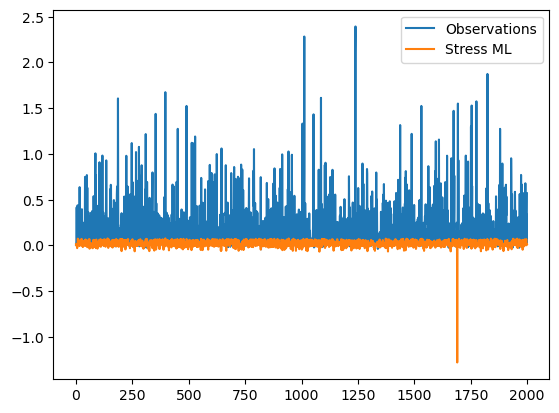

In [204]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [205]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [206]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.30678516677610096

Text(0, 0.5, 'Stress ML [N/m²]')

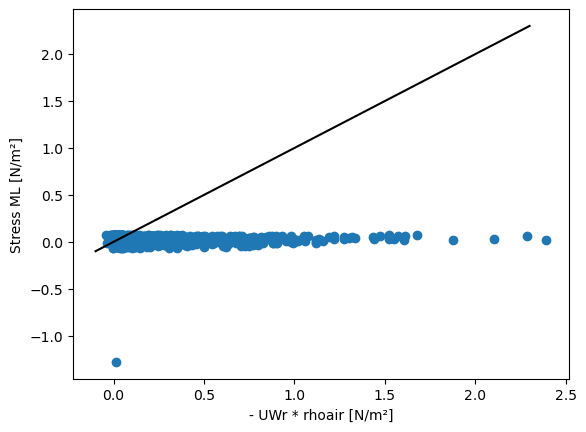

In [207]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [208]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [209]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [210]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 580ms/step - loss: 28.6704 - mean_absolute_error: 3.6356 - val_loss: 1.0660 - val_mean_absolute_error: 0.7174
Epoch 2/1000
3/3 [==============================] - 2s 522ms/step - loss: 3.3910 - mean_absolute_error: 1.4247 - val_loss: 0.8001 - val_mean_absolute_error: 0.6780
Epoch 3/1000
3/3 [==============================] - 2s 519ms/step - loss: 2.1375 - mean_absolute_error: 1.1338 - val_loss: 0.7448 - val_mean_absolute_error: 0.6001
Epoch 4/1000
3/3 [==============================] - 2s 531ms/step - loss: 1.5395 - mean_absolute_error: 0.9236 - val_loss: 0.8062 - val_mean_absolute_error: 0.6555
Epoch 5/1000
3/3 [==============================] - 2s 535ms/step - loss: 1.7547 - mean_absolute_error: 0.9924 - val_loss: 0.8099 - val_mean_absolute_error: 0.6244
Epoch 6/1000
3/3 [==============================] - 2s 523ms/step - loss: 1.7433 - mean_absolute_error: 0.9098 - val_loss: 0.7262 - val_mean_absolute_error: 0.5995
Epoch 7/1000
3/

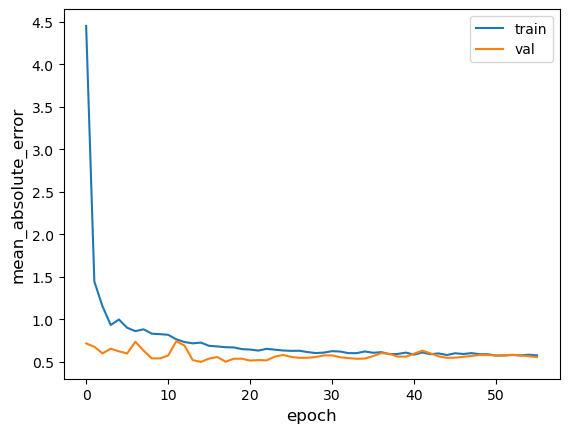

63/63 [==============================] - 2s 25ms/step - loss: 1.3037 - mean_absolute_error: 0.6186
Test accuracy 0.6186085343360901
Test loss 1.3036859035491943


In [211]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [212]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [213]:
rmse(y_test.values, y_test_pred)

0.2829782530583894

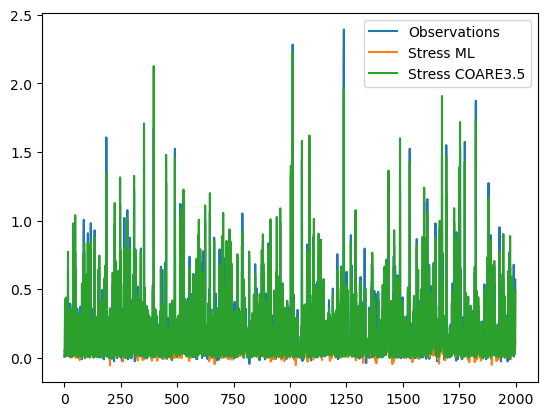

In [214]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

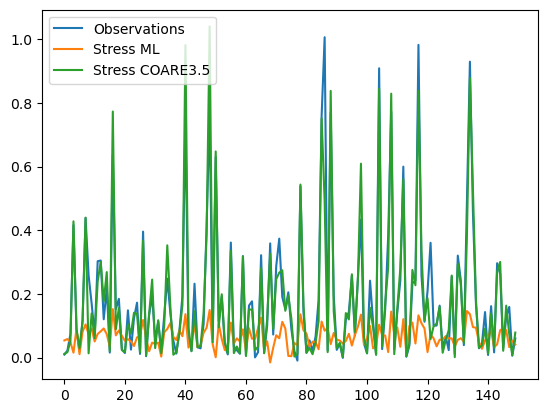

In [215]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [216]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50093528],
       [0.50093528, 1.        ]])

In [217]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

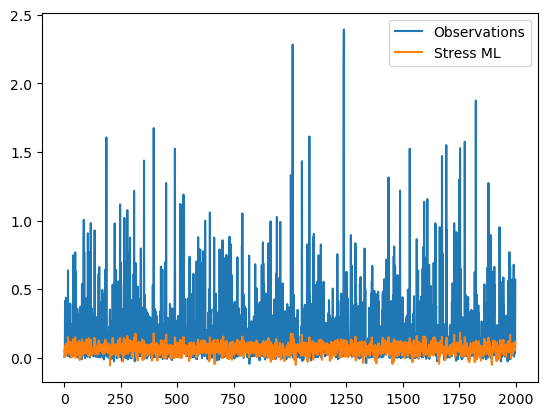

In [218]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [219]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

In [220]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2829782530583894

Text(0, 0.5, 'Stress ML [N/m²]')

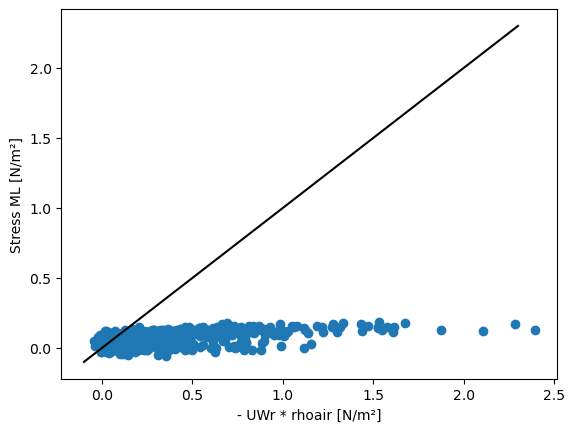

In [221]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [222]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [223]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [224]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 659ms/step - loss: 23.7977 - mean_absolute_error: 3.2805 - val_loss: 1.0480 - val_mean_absolute_error: 0.6689
Epoch 2/1000
3/3 [==============================] - 2s 590ms/step - loss: 4.2537 - mean_absolute_error: 1.6168 - val_loss: 0.7197 - val_mean_absolute_error: 0.5171
Epoch 3/1000
3/3 [==============================] - 2s 583ms/step - loss: 2.2515 - mean_absolute_error: 1.1573 - val_loss: 0.6977 - val_mean_absolute_error: 0.5091
Epoch 4/1000
3/3 [==============================] - 2s 644ms/step - loss: 1.9448 - mean_absolute_error: 1.0267 - val_loss: 3.0313 - val_mean_absolute_error: 1.4028
Epoch 5/1000
3/3 [==============================] - 2s 590ms/step - loss: 2.0650 - mean_absolute_error: 1.0791 - val_loss: 3.8959 - val_mean_absolute_error: 1.8028
Epoch 6/1000
3/3 [==============================] - 2s 586ms/step - loss: 1.6033 - mean_absolute_error: 0.9180 - val_loss: 6.0157 - val_mean_absolute_error: 2.3134
Epoch 7/1000
3/

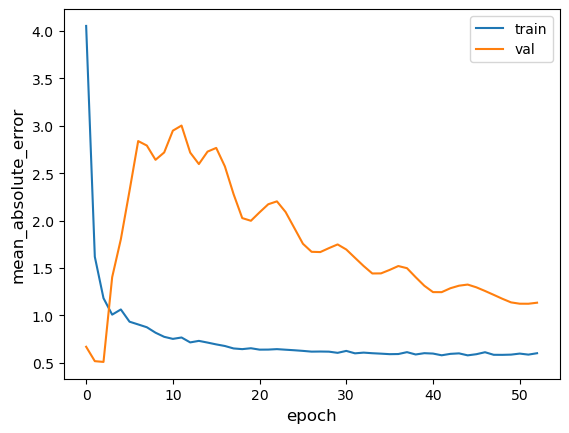

63/63 [==============================] - 2s 26ms/step - loss: 56.5303 - mean_absolute_error: 5.4717
Test accuracy 5.471673011779785
Test loss 56.53026580810547


In [225]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [226]:
y_test_pred = multi_dense_model.predict(x_test)

In [227]:
rmse(y_test.values, y_test_pred)

7.529074727016024

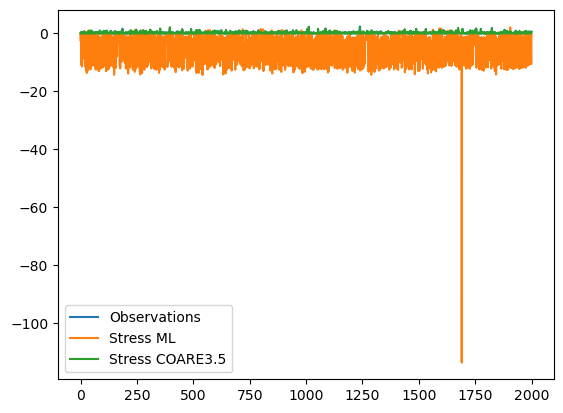

In [228]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

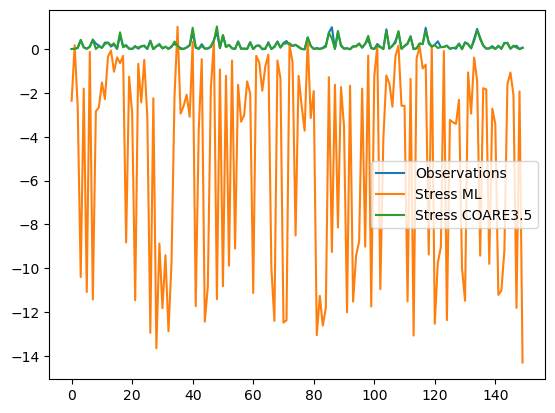

In [229]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [230]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.05956768],
       [0.05956768, 1.        ]])

In [231]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97925788],
       [0.97925788, 1.        ]])

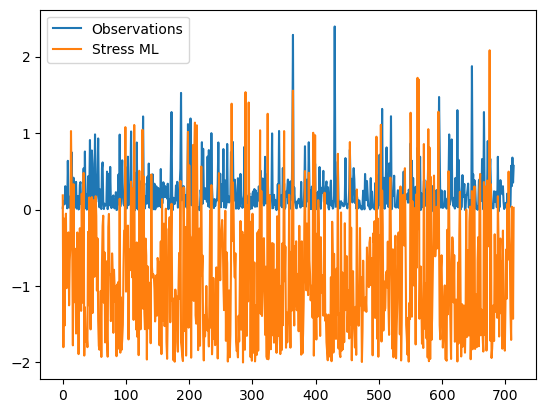

In [232]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [233]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98071263],
       [0.98071263, 1.        ]])

In [234]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

1.4167075888920533

Text(0, 0.5, 'Stress ML [N/m²]')

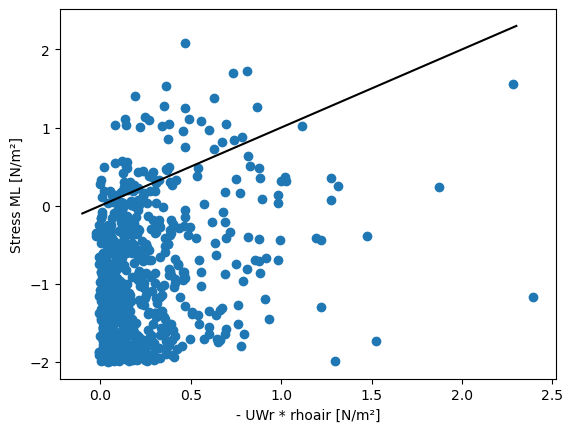

In [235]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 